# Interpolación en una imagen usando funciones *spline*

Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$, equiespaciados en $[a,b]$,  definidos adecuadamente para que los puntos esten (aproximadamente) situados en la superficie del domo,  del edificio que representa la imagen.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 



5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import lagrange

%matplotlib inline

In [0]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload() #Dar la direccion para cargar el archivo planetarios.png



Saving planetario.png to planetario (1).png


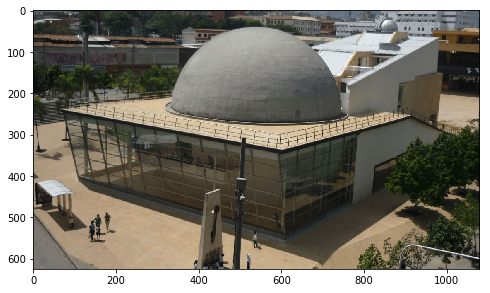

In [0]:
# 1. Carguemos y mostremos la imagen
plt.figure(figsize=(8, 6))
imagen = plt.imread('planetario.png') 
plt.imshow(imagen)
plt.show()



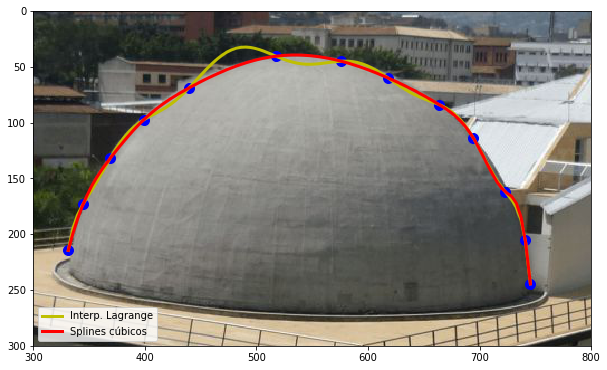

In [0]:

x_=[0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3]
y_=[1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25]

p_lagrange = lagrange(x_, y_)


xx = np.linspace( np.min(x_), np.max(x_), 100)
S_cubico =  interpolate.interp1d(x_, y_, kind = "cubic")
#S_cubico = interpolate.CubicSpline(x_, y_ ) #Las parejas deben de estar en orden para emplear esta rutina

plt.figure(figsize=(10, 8))
plt.imshow(imagen)

plt.plot(x_, y_,  'bo', markersize = 1)
plt.plot(xx, p_lagrange(xx), "y-", lw=3, label='Interp. Lagrange')
plt.plot(xx, S_cubico(xx),   "r-", lw=3, label = u'Splines cúbicos')
plt.ylim(300, 0)
plt.xlim(300, 800)
plt.legend(loc='lower left')
plt.show()

Como se puede apreciar, la interpolación de Lagrange en puntos equidistribuidos presenta oscilaciones. Se trata del fenómeno de Runge, que consecuencia de que no está garantizado que el error de interpolación converja a cero cuando aumentamos el número de puntos.

Sin embargo, en el caso de la interpolación a trozos, podemos garantizar la convergencia a cero del interpolante cuando el número de puntos tiende a infinito.